_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 16)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 66        
Total params: 168,418
Trainable params: 168,418
Non-trainable params: 0
_________________________________________________________________
Trai

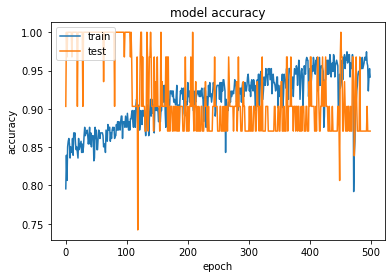

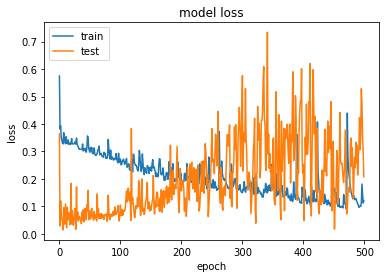

In [35]:
import numpy as np

import tensorflow as tf
covid = [0., 1]
covid = np.array(covid)
nocovid = [1, 0.]
nocovid = np.array(nocovid)

train = np.ones(shape=(305,32, 16))
ytrain = np.ones(shape=(305,2))
i = 1
for i in range(1, 170): # 169个
    x = np.load("../autodl-tmp/capsule108/covid/covid" + str(i) + ".npy")
    # train[i-1] = np.expand_dims((np.mean(x,axis= 0)),0) #weizhishi  0 - 168
    train[i-1] = np.max(x,0)
    ytrain[i-1] = covid

    i = i + 1
for i2 in range(1, 61): #60个
    x = np.load("../autodl-tmp/capsule108/cap/cap" + str(i2) + ".npy")
    # train[i2+168] = np.expand_dims((np.mean(x,axis= 0)),0)
    train[i2+168] = np.max(x,0)
    ytrain[i2+168] =nocovid

    i2 = i2 +1
for i3 in range(1, 77): # 76个
    x = np.load("../autodl-tmp/capsule108/normal/normal" + str(i3) + ".npy")
    # train[i3+228] =np.expand_dims((np.mean(x,axis= 0)),0)
    train[i3+228] = np.max(x,0)
    ytrain[i3+228] = nocovid

    i3 = i3 +1
# print(train)
# print(ytrain)
#
index = [i for i in range(len(train))]
# np.random.shuffle(index)
# x_train = train[index]
# y_train = ytrain[index]
x_train = train
y_train = ytrain
import keras
import numpy
import tensorflow as tf
import torch
from keras import Sequential
from keras.models import Model
from keras.layers import *
import numpy as np




class next(Layer):
    def __init__(self, x):
        super().__init__()
        self.x = x

    def call(self, tensor):
        out = tf.expand_dims(tensor, 2)
        out2 = tf.expand_dims(out, 2)

        # out_f = tf.reshape(out3,shape=(1,32,16))
        return out2

    def compute_output_shape(self, input_shape):
        return (None,110, 1, 1)

class max(Layer):
    def __init__(self, x):
        super().__init__()
        self.x = x

    def call(self, y):
        mul = self.x * y
        out3 = tf.reduce_max(mul, 1, keep_dims=False)
        out4 = tf.reduce_mean(mul, 1, keep_dims=False)
        out5 = 0.5*(out4+out3)
        return out5
        # return out3

    def compute_output_shape(self, input_shape):
        return (None, 32, 16)



input_image = np.ones((1,108,32,16))
# input_tensor1 = Input(shape=(108, 32, 16))
# input1 = reshape((1,120,32,16))(input_tensor1)
# squeeze = GlobalAveragePooling2D(data_format='channels_first')(input_tensor1)
# fullayer = Dense(7,activation="relu")(squeeze)
# extract = Dense(108, activation='sigmoid')(fullayer)
# 这里输出的就是一个1*110的矩阵 就是权重
# quanzhong = next(1)(extract)
# avg = max(input_tensor1)(quanzhong)
input_tensor1 = Input(shape=(32,16))
# x2 = Flatten()(input_tensor)
# x2 = Dense(256,activation = 'relu')(x2)
fla = Flatten()(input_tensor1)
# fla = Flatten()(avg)
x1 = Dense(256, activation='relu')(fla)
x2 = Dense(128, activation='relu')(x1)
x3 = Dense(32, activation='relu')(x2)
out_fi = Dense(2, activation='softmax')(x3)
model1 = Model(input_tensor1, out_fi)
model1.summary()


from keras import optimizers
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.utils import class_weight
from sklearn.metrics import roc_curve, auc
opt = optimizers.Adam(lr=0.001)

model1.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy']) #adadelta

batch_size = 16
epochs = 500
history = model1.fit(
        [x_train], [y_train],
        batch_size=batch_size,
        epochs=epochs,
        # shuffle=True,
        validation_split= 0.1,
)
mp = "../mean621_noweight_model.h5" #max16 0.885
# model1.save(mp)

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# # # import torch


In [ ]:
i = 1
x_c = np.ones(shape=(108,32, 16))
a=0
for i in range(1, 170): # 169个
    x = np.load("../autodl-tmp/capsuleall3216/covid/covidmap" + str(i) + ".npy")
    all_number = x.shape[0]
    zhongjiang = int(all_number/2)
    for index in range(int(zhongjiang)-54,(zhongjiang)): #weizhishi  0 - 168
        x_c[a] = x[index]
        a= a+1

    for index in range(zhongjiang,zhongjiang+54): #weizhishi  0 - 168
        x_c[a] = x[index]
        a= a+1
    a = 0
    np.save('../autodl-tmp/capsule108/covid/covid'+str(i), x_c)
    print('ok',i)
    i = i + 1
for i2 in range(1, 61): #60个
    x = np.load("../autodl-tmp/capsuleall3216/cap/capmap" + str(i2) + ".npy")
    all_number = x.shape[0]
    zhongjiang = int(all_number/2)
    for index in range(int(zhongjiang)-54,(zhongjiang)): #weizhishi  0 - 168
        x_c[a] = x[index]
        a= a+1

    for index in range(zhongjiang,zhongjiang+54): #weizhishi  0 - 168
        x_c[a] = x[index]
        a= a+1
    a = 0
    np.save('../autodl-tmp/capsule108/cap/cap'+str(i2), x_c)
    print('ok',i2)
    i2 = i2 + 1
for i3 in range(1, 77): # 76个
    x = np.load("../autodl-tmp/capsuleall3216/normal/normalmap" + str(i3) + ".npy")
    all_number = x.shape[0]
    zhongjiang = int(all_number/2)
    for index in range(int(zhongjiang)-54,(zhongjiang)): #weizhishi  0 - 168
        x_c[a] = x[index]
        a= a+1

    for index in range(zhongjiang,zhongjiang+54): #weizhishi  0 - 168
        x_c[a] = x[index]
        a= a+1
    
    print('ok',i3)
    a = 0
    np.save('../autodl-tmp/capsule108/normal/normal'+str(i3), x_c)
    i3 = i3 + 1
# print(train)
# print(ytrain)

In [ ]:
import torch
from keras.layers import *
from keras.models import Model
import numpy
input_tensor = Input(shape=(32,16))
x2 = Flatten()(input_tensor)
x2 = Dense(256,activation = 'relu')(x2)
x2 = Dense(128,activation = 'relu')(x2)
x2 = Dense(32,activation = 'relu')(x2)
out2 = Dense(2, activation = 'softmax')(x2)
model2 = Model(input_tensor,out2)
model2.load_weights('binary-max-v4.h5')
a = []
nocovid = 0
for i in range(1,170):
    path = '../autodl-tmp/capsuelall3216/covid/covidmap'+str(i)+'.npy'
    y = numpy.load(path)
    y1 = numpy.max(y,0)
    # y2 = numpy.mean(y,0)
    y4 = numpy.zeros((1,32,16))
    # y4[0] = 0.5*(y1 + y2) 45 73
    y4[0] = y1
    x = model2.predict(y4)
    if x[0][1] >0.5:
        nocovid+=1
        a.append(i)
        print(x)
print(nocovid,a)

In [ ]:
#测试组合池化

In [ ]:
import pylab
import torch
from keras import backend as K
from keras.layers import Layer
from keras import activations
from keras import utils
from keras.models import Model
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import keras
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.utils import class_weight
from sklearn.metrics import roc_curve, auc
import os
import matplotlib.pyplot as plt
import pydicom
import cv2
from lungmask import mask  # lung segmentation model
import SimpleITK as sitk
import matplotlib
# Set the path based on your data directory
data_path = r'autodl-nas/covid/P005'
# Set the cut-off probability for the classification output (Default : 0.5)
cutoff = 0.5
onepic = 0
K.set_image_data_format('channels_last')
qiepian_kaishi=1
qiepian_jieshu=133
# model1 
# batch_size = 16
# epochs= 100
# learn_rate = 0.0001

# model2
# batch_size = 16
# epochs= 500
# learn_rate = 0.001

def squash(x, axis=-1):
    s_squared_norm = K.sum(K.square(x), axis, keepdims=True) + K.epsilon() # 有人尝试把epsilon替换成0.001
    scale = K.sqrt(s_squared_norm) / (1 + s_squared_norm)
    return scale * x


def softmax(x, axis=-1):
    ex = K.exp(x - K.max(x, axis=axis, keepdims=True))
    return ex / K.sum(ex, axis=axis, keepdims=True)


def margin_loss(y_true, y_pred):
    lamb, margin = 0.5, 0.1
    return K.sum((y_true * K.square(K.relu(1 - margin - y_pred)) + lamb * (
            1 - y_true) * K.square(K.relu(y_pred - margin))), axis=-1)

from torch import nn
from torch.nn import init



class Capsule(Layer):

    def __init__(self,
                 num_capsule, # 胶囊数目 16个胶囊
                 dim_capsule, # 每个胶囊的维度 32个维度
                 routings=3,
                 share_weights=True,
                 activation='squash',
                 **kwargs):
        super(Capsule, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings
        self.share_weights = share_weights
        if activation == 'squash':
            self.activation = squash
        else:
            self.activation = activations.get(activation)

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'num_capsule': self.num_capsule,
            'dim_capsule': self.dim_capsule,
            'routings': self.routings,
            'share_weight': self.share_weights,

        })
        return config

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        if self.share_weights:
            self.kernel = self.add_weight(
                name='capsule_kernel',
                shape=(1, input_dim_capsule,
                       self.num_capsule * self.dim_capsule),
                initializer='glorot_uniform',
                trainable=True)
        else:
            input_num_capsule = input_shape[-2]
            self.kernel = self.add_weight(
                name='capsule_kernel',
                shape=(input_num_capsule, input_dim_capsule,
                       self.num_capsule * self.dim_capsule),
                initializer='glorot_uniform',
                trainable=True)

    def call(self, inputs):

        if self.share_weights:
            hat_inputs = K.conv1d(inputs, self.kernel)
        else:
            hat_inputs = K.local_conv1d(inputs, self.kernel, [1], [1])

        batch_size = K.shape(inputs)[0]
        input_num_capsule = K.shape(inputs)[1]
        hat_inputs = K.reshape(hat_inputs,
                               (batch_size, input_num_capsule,
                                self.num_capsule, self.dim_capsule))
        hat_inputs = K.permute_dimensions(hat_inputs, (0, 2, 1, 3))

        b = K.zeros_like(hat_inputs[:, :, :, 0])
        for i in range(self.routings):
            c = softmax(b, 1)
            o = self.activation(keras.backend.batch_dot(c, hat_inputs, [2, 2]))
            if i < self.routings - 1:
                b = keras.backend.batch_dot(o, hat_inputs, [2, 3])
                if K.backend() == 'theano':
                    o = K.sum(o, axis=1)

        return o

    def compute_output_shape(self, input_shape):
        return (None, self.num_capsule, self.dim_capsule)
    
input_image = Input(shape=(None, None, 1))
x = Conv2D(64, (3, 3), activation='relu', trainable=True)(input_image)
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros',
                       gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones',
                       beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)(x)
x = Conv2D(64, (3, 3), activation='relu', trainable=True)(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', trainable=True)(x)
x= Conv2D(128, (3, 3), activation='relu', trainable=True)(x) # (116, 126, 126, 64)
#
x = Reshape((-1, 128))(x)
x = Capsule(32, 16)(x)
x = Capsule(32, 16)(x)
capsule = Capsule(2, 16)(x)
output = Lambda(lambda z: K.sqrt(K.sum(K.square(z), 2)))(capsule)

model = Model(inputs=[input_image], outputs=[output])
# adam = optimizers.Adam(lr=1e-4)
# model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
# # model.save_weights("model.h5")
model.load_weights('weights-2class-v1-71.h5')
input_stage_fe = model.input
output_stage_fe = model.layers[-3].output
model_fe = Model(input_stage_fe,output_stage_fe)



In [ ]:
import numpy
path = '../autodl-tmp/lung/covid/covid1.npy'
x = numpy.load(path)
print(numpy.all(x[0]==0))

In [ ]:
5.17
from keras.layers import *
from keras.models import Model
input_tensor = Input(shape=(32,16))
x2 = Flatten()(input_tensor)
x2 = Dense(256,activation = 'relu')(x2)
x2 = Dense(128,activation = 'relu')(x2)
x2 = Dense(32,activation = 'relu')(x2)
out2 = Dense(2, activation = 'softmax')(x2)
model2 = Model(input_tensor,out2)
# model2.load_weights('../autodl-tmp/maxmean_model.h5') 
model2.load_weights('mean621_108_noweight_model.h5')
from sklearn.metrics import roc_auc_score
import numpy
covid=0
cap=0
normal=0
nocovid=0
nocap=0
nonormal=0
true = numpy.zeros((305,2))
pred =numpy.zeros((305,2))
zzz = 0
for i in range(1,170):
    path = '../autodl-tmp/capsule1083216/covid/covidmap'+str(i)+'.npy'
    x = numpy.load(path)
    # x2 = numpy.zeros((108,256,256,1))
    # zhongjian = x.shape[0]/2
    # ceshi= 0
    # for z in range(zhongjian-54,zhongjian):
    #     x2[ceshi]=x[z]
    #     ceshi+=1
    # for z in range(zhongjian,zhongjian+54):
    #     x2[ceshi]=x[z]
    #     ceshi+=1
    # y = model_fe.predict(x2) #108,32,16,1
    out1 = numpy.max(x,0)
    out2 = numpy.mean(x,0)
    out3 = 0.5*(out1+out2)
    c = numpy.zeros((1,32,16))
    c[0] = out3
    y2 = model2.predict(c)
    pred[i-1] = y2
    true[i-1] = [0,1]
    if y2[0][1]>0.5:
        covid+=1
    else:
        nocovid+=1
        print(path)
  
for i in range(1,77):
    path = '../autodl-tmp/capsule1083216/normal/normalmap'+str(i)+'.npy'
    x = numpy.load(path)
    # y = model_fe.predict(x) #108,32,16,1
    out1 = numpy.max(x,0)
    out2 = numpy.mean(x,0)
    out3 = 0.5*(out1+out2)
    c = numpy.zeros((1,32,16))
    c[0] = out3
    y2 = model2.predict(c)
    pred[i+168] = y2
    true[i+168] = [1,0]
    if y2[0][1]>0.5:
        nonormal+=1
        print(path)
    else:normal+=1
    
for i in range(1,61):
    path = '../autodl-tmp/capsule1083216/cap/capmap'+str(i)+'.npy'
    x = numpy.load(path)
    # x2 = numpy.zeros((108,256,256,1))
    # zhongjian = x.shape[0]/2
    # ceshi= 0
    # z=0
    # for z in range(zhongjian-54,zhongjian):
    #     x2[ceshi]=x[z]
    #     ceshi+=1
    # for z in range(zhongjian,zhongjian+54):
    #     x2[ceshi]=x[z]
    #     ceshi+=1
    # y = model_fe.predict(x2) #108,32,16,1
    out1 = numpy.max(x,0)
    out2 = numpy.mean(x,0)
    out3 = 0.5*(out1+out2)
    c = numpy.zeros((1,32,16))
    c[0] = out3
    y2 = model2.predict(c)
    pred[i+244] = y2
    true[i+244] = [1,0]
    if y2[0][1]>0.5:
        nocap+=1
        print(path)
    else:cap+=1
    
acc = (305-nocap-nonormal-nocovid)/305

Sensitivity = 1-(nocovid/169)

Specificity = 1 - (nocap+nonormal)/136
import numpy as np
# from sklearn import metrics
auc = roc_auc_score(true,pred)
print("acc,Sensitivity,Specificity,auc",acc,Sensitivity,Specificity,auc)

In [ ]:
import numpy
y= 22984
z = numpy.zeros((10000,256,256,1))
z2 = numpy.zeros((10000,2))
path2 = '../Slice-level-labels.npy'
c= numpy.load(path2)
index = 0
i=0
number = 0
for i in range(1,170):
    path = '../autodl-tmp/lung/covid/covid'+str(i)+'.npy'
    x = numpy.load(path)
    i2=0
    for i2 in range(0,x.shape[0]):
        z[index] = x[i2]
        z2[index] = c[i-1][i2]
        index +=1
        number+=1
print(number)
i=0
for i in range(1,55):
    path = '../autodl-tmp/lung/cap/cap'+str(i)+'.npy'
    x = numpy.load(path)
    # y+=x.shape[0]
    i2=0
    for i2 in range(0,x.shape[0]):
        z[index] = x[i2]
        index +=1
        number+=1
print(number)
i=0
for i in range(1,77):
    path = '../autodl-tmp/lung/normal/normal'+str(i)+'.npy'
    x = numpy.load(path)
    i2 =0
    for i2 in range(0,x.shape[0]):
        z[index] = x[i2]
        z[]
        index +=1
        number+=1
print(number)


In [ ]:
path2 = '../Slice-level-labels.npy'
c= numpy.load(path2)
index =0
for i in range(1,56):
    path = '../autodl-tmp/lung/covid/covid'+str(i)+'.npy'
    x = numpy.load(path)
    i2=0
    for i2 in range(0,x.shape[0]):
        if c[i-1][i2] == 1:
            z2[index][1] =1
            index +=1
        if c[i-1][i2] == 0:
            z2[index][0] =1
            index +=1
i=0
for i in range(1,23):
    path = '../autodl-tmp/lung/cap/cap'+str(i)+'.npy'
    x = numpy.load(path)
    # y+=x.shape[0]
    i2=0
    for i2 in range(0,x.shape[0]):
        if c[i-1][i2] == 1:
            z2[index][1] =1
            index +=1
        if c[i-1][i2] == 0:
            z2[index][0] =1
            index +=1
i=0
for i in range(1,77):
    path = '../autodl-tmp/lung/normal/normal'+str(i)+'.npy'
    x = numpy.load(path)
    # y+=x.shape[0]
    i2 =0
    for i2 in range(0,x.shape[0]):
        if c[i-1][i2] == 1:
            z2[index][1] =1
            index +=1
        if c[i-1][i2] == 0:
            z2[index][0] =1
            index +=1
print(numpy.all(z2==0))

In [ ]:
batch_size = 16
epochs = 100
history = model.fit(
        [z], [z2],
        batch_size=batch_size,
        epochs=epochs,
        shuffle=True,
        # validation_data= ([z],[z2]),
        validation_split=0.2,
    #validation_split=0.2,
    verbose=1
)
mp = "capsule5.10.h5" #max16 0.885
model.save(mp)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

covid = [0., 1]
covid = np.array(covid)
nocovid = [1, 0.]
nocovid = np.array(nocovid)

ytrain = np.ones(shape=(305, 2))


adam = optimizers.Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
batch_size = 305
epochs = 500
history = model.fit(
        [x_train], [y_train],
        batch_size=batch_size,
        epochs=epochs,
        shuffle=True,
        validation_data= ([x_train],[y_train]),
        # validation_split=0.2,
    #validation_split=0.2,
    verbose=1
)
mp = "../autodl-tmp/feature_model.h5" #max16 0.885
model1.save(mp)

In [ ]:
import numpy as np


import keras
import numpy
import tensorflow as tf
import torch
from keras import Sequential
from keras.models import Model
from keras.layers import *
import numpy as np
from sklearn.tests.test_base import K
from tensorflow import expand_dims





class next(Layer):
    def __init__(self, x):
        super().__init__()
        self.x = x

    def call(self, tensor):
        out = tf.expand_dims(tensor, 2)
        out2 = tf.expand_dims(out, 2)

        # out_f = tf.reshape(out3,shape=(1,32,16))
        return out2

    def compute_output_shape(self, input_shape):
        return (None,108, 1, 1)

class max(Layer):
    def __init__(self, x):
        super().__init__()
        self.x = x

    def call(self, y):
        mul = self.x * y
        out3 = tf.reduce_max(mul, 1, keep_dims=False)

        return out3

    def compute_output_shape(self, input_shape):
        return (None, 32, 16)


# test = np.ones(shape=(1, 108, 32, 16))
# test[0] = np.load("../autodl-tmp/3.30/covid/covidmap1.npy")
# input_image = np.ones((1,108,32,16))
    # input_tensor1 = Input(shape=(108, 32, 16))
    # # input1 = reshape((1,120,32,16))(input_tensor1)
    # squeeze = GlobalAveragePooling2D(data_format='channels_first')(input_tensor1)
    # fullayer = Dense(7, activation="relu")(squeeze)
    # extract = Dense(108, activation='sigmoid')(fullayer)
    # #这里输出的就是一个1*110的矩阵 就是权重
    # quanzhong = next(1)(extract)
    # avg = max(input_tensor1)(quanzhong)
    # fla = Flatten()(avg)
    # x1 = Dense(256, activation='relu')(fla)
    # x2 = Dense(128, activation='relu')(x1)
    # x3 = Dense(32, activation='relu')(x2)
    # out_fi = Dense(2, activation='softmax')(x3)
    # model1 = Model(input_tensor1, out_fi)
    # model1.summary()

model1.load_weights("../autodl-tmp/max8_108_model.h5")

# 10 covid 156   16 covid 157   14 covid 158  7 covid 157
# model2 = Model(input_tensor1, model1.layers[3].output)
# td = model2.predict(test)
# print(td)
# model3 = Model(input_tensor1, model1.layers[-6].output)
# qz = model3.predict(test)
# print(qz)
all = []
covidnumber = []
cap_pred = np.ones(shape=(170,2))
cap_true = np.ones(shape=(170,2))
for i in range(1,61):
    test = np.ones(shape=(1, 108, 32, 16))
    test[0] = np.load("../autodl-tmp/capsule1083216/normal/normalmap"+str(i)+".npy")
    c4 = model1.predict(test)
    cap_pred[i-1] = c4
    cap_true[i-1] = [1,0]
    if c4[:,1] > 0.5:
        pred= "covid"

    else:
        pred = "nocovid"
        covidnumber.append(i)
    all.append({"truth":i,
                "pred":pred})
    print(pred,i)
print(all)
print(covidnumber)

import numpy as np
# from sklearn import metrics
# fpr, tpr, thresholds = metrics.roc_curve(cap_true,cap_pred, pos_label=1)
# s = metrics.auc(fpr, tpr)
# print(s)
'''
[{'truth': 1, 'pred': 'nocovid'}, {'truth': 2, 'pred': 'covid'}, {'truth': 3, 'pred': 'nocovid'}, {'truth': 4, 'pred': 'nocovid'}, {'truth': 5, 'pred': 'nocovid'}, {'truth': 6, 'pred': 'nocovid'}, {'truth': 7, 'pred': 'nocovid'}, {'truth': 8, 'pred': 'nocovid'}, {'truth': 9, 'pred': 'nocovid'}, {'truth': 10, 'pred': 'nocovid'}, {'truth': 11, 'pred': 'nocovid'}, {'truth': 12, 'pred': 'nocovid'}, {'truth': 13, 'pred': 'nocovid'}, {'truth': 14, 'pred': 'nocovid'}, {'truth': 15, 'pred': 'covid'}, {'truth': 16, 'pred': 'nocovid'}, {'truth': 17, 'pred': 'nocovid'}, {'truth': 18, 'pred': 'nocovid'},
 {'truth': 19, 'pred': 'nocovid'}, {'truth': 20, 'pred': 'nocovid'}, {'truth': 21, 'pred': 'nocovid'}, {'truth': 22, 'pred': 'nocovid'}, {'truth': 23, 'pred': 'nocovid'}, {'truth': 24, 'pred': 'nocovid'}, {'truth': 25, 'pred': 'nocovid'}, {'truth': 26, 'pred': 'nocovid'}, {'truth': 27, 'pred': 'nocovid'}, {'truth': 28, 'pred': 'covid'}, {'truth': 29, 'pred': 'covid'}, {'truth': 30, 'pred': 'nocovid'}, {'truth': 31, 'pred': 'nocovid'}, {'truth': 32, 'pred': 'nocovid'}, {'truth': 33, 'pred': 'covid'}, {'truth': 34, 'pred': 'nocovid'}, {'truth': 35, 'pred': 'covid'}, {'truth': 36, 'pred': 'covid'},
  {'truth': 37, 'pred': 'covid'}, {'truth': 38, 'pred': 'nocovid'}, {'truth': 39, 'pred': 'nocovid'}, {'truth': 40, 'pred': 'covid'}, {'truth': 41, 'pred': 'nocovid'}, {'truth': 42, 'pred': 'nocovid'}, {'truth': 43, 'pred': 'nocovid'}, {'truth': 44, 'pred': 'covid'}, {'truth': 45, 'pred': 'covid'}, {'truth': 46, 'pred': 'covid'}, {'truth': 47, 'pred': 'nocovid'}, {'truth': 48, 'pred': 'nocovid'}, {'truth': 49, 'pred': 'nocovid'}, {'truth': 50, 'pred': 'covid'}, {'truth': 51, 'pred': 'nocovid'}, {'truth': 52, 'pred': 'covid'}, {'truth': 53, 'pred': 'nocovid'}, {'truth': 54, 'pred': 'covid'}, {'truth': 55, 'pred': 'covid'}, 
  {'truth': 56, 'pred': 'covid'}, {'truth': 57, 'pred': 'nocovid'}, {'truth': 58, 'pred': 'covid'}, {'truth': 59, 'pred': 'nocovid'}, {'truth': 60, 'pred': 'covid'}]
19
'''

'''
covid 144  false 25
'''

'''
normal 0
'''

In [ ]:
import numpy as np
import keras
import numpy
import tensorflow as tf
import torch
from keras import Sequential
from keras.models import Model
from keras.layers import *
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.tests.test_base import K
from tensorflow import expand_dims





class next(Layer):
    def __init__(self, x):
        super().__init__()
        self.x = x

    def call(self, tensor):
        out = tf.expand_dims(tensor, 2)
        out2 = tf.expand_dims(out, 2)

        # out_f = tf.reshape(out3,shape=(1,32,16))
        return out2

    def compute_output_shape(self, input_shape):
        return (None,108, 1, 1)

class max(Layer):
    def __init__(self, x):
        super().__init__()
        self.x = x

    def call(self, y):
        mul = self.x * y
        out3 = tf.reduce_max(mul, 1, keep_dims=False)
        out4 = tf.reduce_mean(mul, 1, keep_dims=False)
        out5 = 0.5*(out4+out3)
        return out5
        # return out3

    def compute_output_shape(self, input_shape):
        return (None, 32, 16)


# test = np.ones(shape=(1, 110, 32, 16))
# test[0] = np.load("../autodl-tmp/3.30/covid/covidmap1.npy")
input_image = np.ones((1,108,32,16))
input_tensor1 = Input(shape=(108, 32, 16))
# input1 = reshape((1,120,32,16))(input_tensor1)
squeeze = GlobalAveragePooling2D(data_format='channels_first')(input_tensor1)
fullayer = Dense(7, activation="relu")(squeeze)
extract = Dense(108, activation='sigmoid')(fullayer)
#这里输出的就是一个1*110的矩阵 就是权重
quanzhong = next(1)(extract)
avg = max(input_tensor1)(quanzhong)
fla = Flatten()(avg)
x1 = Dense(256, activation='relu')(fla)
x2 = Dense(128, activation='relu')(x1)
x3 = Dense(32, activation='relu')(x2)
out_fi = Dense(2, activation='softmax')(x3)
model1 = Model(input_tensor1, out_fi)
model1.summary()
model2 = Model(input_tensor1, model1.layers[4].output)
#model1.load_weights("../ct_train/max7_108_model4.h5")
#np.resize
model1.load_weights("../maxmean8_108_model.h5")
# 10 covid 156   16 covid 157   14 covid 158  7 covid 157
# model2 = Model(input_tensor1, model1.layers[3].output)
# td = model2.predict(test)
# print(td)
# model3 = Model(input_tensor1, model1.layers[-6].output)
# qz = model3.predict(test)
# print(qz)
all = []
covidnumber = []
fcovid = 0
cap_pred = np.ones(shape=(305,2))
cap_true = np.ones(shape=(305,2))
for i in range(1,170):
    test = np.ones(shape=(1,108, 32, 16))
    test[0] = np.load("../autodl-tmp/capsule1083216/covid/covidmap"+str(i)+".npy")
    c4 = model1.predict(test)
    onetime = model2.predict(test)
    cap_pred[i-1] = c4
    cap_true[i-1] = [0,1]
    if c4[:,1] > c4[:,0]:
        pred= "covid"
    else:
        pred = "nocovid"
        covidnumber.append(i)
        fcovid+=1
    all.append({"truth":i,
                "pred":pred,
                "c4":c4},)
    print(c4)  # [[8.867428e-05 9.999113e-01]]

import matplotlib.pyplot as plt

all = []
covidnumber = []
fcap = 0
for i in range(1,61):
    test = np.ones(shape=(1,108, 32, 16))
    test[0] = np.load("../autodl-tmp/capsule1083216/cap/capmap"+str(i)+".npy")
    c4 = model1.predict(test)
    cap_pred[i+168] = c4
    cap_true[i+168] = [1,0]
    if c4[:,1] > 0.5:
        pred= "covid"
        covidnumber.append(i)
        fcap+=1
    else:
        pred = "nocovid"

    all.append({"truth":i,
                "pred":pred})
    # print(pred,i)
print(all)
print(covidnumber)
print(fcap)

all = []
covidnumber = []
fnormal = 0
for i in range(1,77):
    test = np.ones(shape=(1,108, 32, 16))
    test[0] = np.load("../autodl-tmp/capsule1083216/normal/normalmap"+str(i)+".npy")
    c4 = model1.predict(test)
    cap_pred[i+228] = c4
    cap_true[i+228] = [1,0]
    if c4[:,1] > 0.7:
        pred= "covid"
        covidnumber.append(i)
        fnormal +=1
    else:
        pred = "nocovid"
    all.append({"truth":i,
                "pred":pred})
    # print(pred,i)
print(all)
print(covidnumber)

acc = (305-fcap-fnormal-fcovid)/305

Sensitivity = 1-(fcovid/169)

Specificity = 1 - (fcap+fnormal)/136
import numpy as np
# from sklearn import metrics
auc = roc_auc_score(cap_true,cap_pred)
print("acc,Sensitivity,Specificity,auc",acc,Sensitivity,Specificity,auc)

'''
[{'truth': 1, 'pred': 'nocovid'}, {'truth': 2, 'pred': 'covid'}, {'truth': 3, 'pred': 'nocovid'}, {'truth': 4, 'pred': 'nocovid'}, {'truth': 5, 'pred': 'nocovid'}, {'truth': 6, 'pred': 'nocovid'}, {'truth': 7, 'pred': 'nocovid'}, {'truth': 8, 'pred': 'nocovid'}, {'truth': 9, 'pred': 'nocovid'}, {'truth': 10, 'pred': 'nocovid'}, {'truth': 11, 'pred': 'nocovid'}, {'truth': 12, 'pred': 'nocovid'}, {'truth': 13, 'pred': 'nocovid'}, {'truth': 14, 'pred': 'nocovid'}, {'truth': 15, 'pred': 'covid'}, {'truth': 16, 'pred': 'nocovid'}, {'truth': 17, 'pred': 'nocovid'}, {'truth': 18, 'pred': 'nocovid'},
 {'truth': 19, 'pred': 'nocovid'}, {'truth': 20, 'pred': 'nocovid'}, {'truth': 21, 'pred': 'nocovid'}, {'truth': 22, 'pred': 'nocovid'}, {'truth': 23, 'pred': 'nocovid'}, {'truth': 24, 'pred': 'nocovid'}, {'truth': 25, 'pred': 'nocovid'}, {'truth': 26, 'pred': 'nocovid'}, {'truth': 27, 'pred': 'nocovid'}, {'truth': 28, 'pred': 'covid'}, {'truth': 29, 'pred': 'covid'}, {'truth': 30, 'pred': 'nocovid'}, {'truth': 31, 'pred': 'nocovid'}, {'truth': 32, 'pred': 'nocovid'}, {'truth': 33, 'pred': 'covid'}, {'truth': 34, 'pred': 'nocovid'}, {'truth': 35, 'pred': 'covid'}, {'truth': 36, 'pred': 'covid'},
  {'truth': 37, 'pred': 'covid'}, {'truth': 38, 'pred': 'nocovid'}, {'truth': 39, 'pred': 'nocovid'}, {'truth': 40, 'pred': 'covid'}, {'truth': 41, 'pred': 'nocovid'}, {'truth': 42, 'pred': 'nocovid'}, {'truth': 43, 'pred': 'nocovid'}, {'truth': 44, 'pred': 'covid'}, {'truth': 45, 'pred': 'covid'}, {'truth': 46, 'pred': 'covid'}, {'truth': 47, 'pred': 'nocovid'}, {'truth': 48, 'pred': 'nocovid'}, {'truth': 49, 'pred': 'nocovid'}, {'truth': 50, 'pred': 'covid'}, {'truth': 51, 'pred': 'nocovid'}, {'truth': 52, 'pred': 'covid'}, {'truth': 53, 'pred': 'nocovid'}, {'truth': 54, 'pred': 'covid'}, {'truth': 55, 'pred': 'covid'}, 
  {'truth': 56, 'pred': 'covid'}, {'truth': 57, 'pred': 'nocovid'}, {'truth': 58, 'pred': 'covid'}, {'truth': 59, 'pred': 'nocovid'}, {'truth': 60, 'pred': 'covid'}]
19
'''

'''
covid 144  false 25
'''

'''
normal 0
'''

'''
covid nocovid[53, 58, 60, 62, 67, 87, 103, 105, 112, 132, 147, 155, 164]

cap covid [2, 7, 15, 27, 28, 34, 36, 37, 40, 44, 45, 46, 50, 52, 54, 55, 56, 58, 60]

normal
'''

'''
covid 0  3

cap 0  1

normal 0  0
'''

'''
0.6 acc,Sensitivity,Specificity,auc 0.9770491803278688 0.9704142011834319 0.9852941176470589 0.9943873999303863
'''

'''
val
[{'truth': 1, 'pred': 'covid'}, {'truth': 2, 'pred': 'covid'}, {'truth': 3, 'pred': 'covid'}, {'truth': 4, 'pred': 'covid'}, {'truth': 5, 'pred': 'covid'}, {'truth': 6, 'pred': 'covid'}, {'truth': 7, 'pred': 'covid'}, {'truth': 8, 'pred': 'covid'}, {'truth': 9, 'pred': 'covid'}, {'truth': 10, 'pred': 'covid'}, {'truth': 11, 'pred': 'covid'}, {'truth': 12, 'pred': 'covid'}, {'truth': 13, 'pred': 'covid'}, {'truth': 14, 'pred': 'covid'}, {'truth': 15, 'pred': 'covid'}, {'truth': 16, 'pred': 'covid'}, {'truth': 17, 'pred': 'covid'}, {'truth': 18, 'pred': 'covid'}, {'truth': 19, 'pred': 'covid'}, {'truth': 20, 'pred': 'covid'}, {'truth': 21, 'pred': 'covid'}, {'truth': 22, 'pred': 'covid'}, {'truth': 23, 'pred': 'covid'}, {'truth': 24, 'pred': 'covid'}, {'truth': 25, 'pred': 'covid'}, {'truth': 26, 'pred': 'covid'}, {'truth': 27, 'pred': 'covid'}, {'truth': 28, 'pred': 'covid'}, {'truth': 29, 'pred': 'covid'}, {'truth': 30, 'pred': 'covid'}, {'truth': 31, 'pred': 'covid'}, {'truth': 32, 'pred': 'covid'}, {'truth': 33, 'pred': 'covid'}, {'truth': 34, 'pred': 'covid'}, {'truth': 35, 'pred': 'covid'}, {'truth': 36, 'pred': 'covid'}, {'truth': 37, 'pred': 'covid'}, {'truth': 38, 'pred': 'covid'}, {'truth': 39, 'pred': 'covid'}, {'truth': 40, 'pred': 'covid'}, {'truth': 41, 'pred': 'covid'}, {'truth': 42, 'pred': 'covid'}, {'truth': 43, 'pred': 'covid'}, {'truth': 44, 'pred': 'covid'}, {'truth': 45, 'pred': 'covid'}, {'truth': 46, 'pred': 'covid'}, {'truth': 47, 'pred': 'covid'}, {'truth': 48, 'pred': 'covid'}, {'truth': 49, 'pred': 'covid'}, {'truth': 50, 'pred': 'covid'}, {'truth': 51, 'pred': 'covid'}, {'truth': 52, 'pred': 'covid'}, {'truth': 53, 'pred': 'covid'}, {'truth': 54, 'pred': 'covid'}, {'truth': 55, 'pred': 'covid'}, {'truth': 56, 'pred': 'covid'}, {'truth': 57, 'pred': 'covid'}, {'truth': 58, 'pred': 'covid'}, {'truth': 59, 'pred': 'covid'}, {'truth': 60, 'pred': 'covid'}, {'truth': 61, 'pred': 'covid'}, {'truth': 62, 'pred': 'covid'}, {'truth': 63, 'pred': 'covid'}, {'truth': 64, 'pred': 'covid'}, {'truth': 65, 'pred': 'covid'}, {'truth': 66, 'pred': 'covid'}, {'truth': 67, 'pred': 'covid'}, {'truth': 68, 'pred': 'covid'}, {'truth': 69, 'pred': 'covid'}, {'truth': 70, 'pred': 'covid'}, {'truth': 71, 'pred': 'covid'}, {'truth': 72, 'pred': 'covid'}, {'truth': 73, 'pred': 'covid'}, {'truth': 74, 'pred': 'covid'}, {'truth': 75, 'pred': 'covid'}, {'truth': 76, 'pred': 'covid'}, {'truth': 77, 'pred': 'covid'}, {'truth': 78, 'pred': 'covid'}, {'truth': 79, 'pred': 'covid'}, {'truth': 80, 'pred': 'covid'}, {'truth': 81, 'pred': 'covid'}, {'truth': 82, 'pred': 'covid'}, {'truth': 83, 'pred': 'covid'}, {'truth': 84, 'pred': 'covid'}, {'truth': 85, 'pred': 'covid'}, {'truth': 86, 'pred': 'covid'}, {'truth': 87, 'pred': 'covid'}, {'truth': 88, 'pred': 'covid'}, {'truth': 89, 'pred': 'covid'}, {'truth': 90, 'pred': 'covid'}, {'truth': 91, 'pred': 'covid'}, {'truth': 92, 'pred': 'covid'}, {'truth': 93, 'pred': 'covid'}, {'truth': 94, 'pred': 'covid'}, {'truth': 95, 'pred': 'covid'}, {'truth': 96, 'pred': 'covid'}, {'truth': 97, 'pred': 'covid'}, {'truth': 98, 'pred': 'covid'}, {'truth': 99, 'pred': 'covid'}, {'truth': 100, 'pred': 'covid'}, {'truth': 101, 'pred': 'covid'}, {'truth': 102, 'pred': 'covid'}, {'truth': 103, 'pred': 'covid'}, {'truth': 104, 'pred': 'covid'}, {'truth': 105, 'pred': 'nocovid'}, {'truth': 106, 'pred': 'covid'}, {'truth': 107, 'pred': 'covid'}, {'truth': 108, 'pred': 'covid'}, {'truth': 109, 'pred': 'covid'}, {'truth': 110, 'pred': 'covid'}, {'truth': 111, 'pred': 'covid'}, {'truth': 112, 'pred': 'covid'}, {'truth': 113, 'pred': 'covid'}, {'truth': 114, 'pred': 'covid'}, {'truth': 115, 'pred': 'covid'}, {'truth': 116, 'pred': 'covid'}, {'truth': 117, 'pred': 'covid'}, {'truth': 118, 'pred': 'covid'}, {'truth': 119, 'pred': 'covid'}, {'truth': 120, 'pred': 'covid'}, {'truth': 121, 'pred': 'covid'}, {'truth': 122, 'pred': 'covid'}, {'truth': 123, 'pred': 'covid'}, {'truth': 124, 'pred': 'covid'}, {'truth': 125, 'pred': 'covid'}, {'truth': 126, 'pred': 'covid'}, {'truth': 127, 'pred': 'covid'}, {'truth': 128, 'pred': 'covid'}, {'truth': 129, 'pred': 'covid'}, {'truth': 130, 'pred': 'covid'}, {'truth': 131, 'pred': 'covid'}, {'truth': 132, 'pred': 'nocovid'}, {'truth': 133, 'pred': 'covid'}, {'truth': 134, 'pred': 'covid'}, {'truth': 135, 'pred': 'covid'}, {'truth': 136, 'pred': 'covid'}, {'truth': 137, 'pred': 'covid'}, {'truth': 138, 'pred': 'covid'}, {'truth': 139, 'pred': 'covid'}, {'truth': 140, 'pred': 'covid'}, {'truth': 141, 'pred': 'covid'}, {'truth': 142, 'pred': 'covid'}, {'truth': 143, 'pred': 'covid'}, {'truth': 144, 'pred': 'covid'}, {'truth': 145, 'pred': 'covid'}, {'truth': 146, 'pred': 'covid'}, {'truth': 147, 'pred': 'covid'}, {'truth': 148, 'pred': 'covid'}, {'truth': 149, 'pred': 'covid'}, {'truth': 150, 'pred': 'covid'}, {'truth': 151, 'pred': 'covid'}, {'truth': 152, 'pred': 'covid'}, {'truth': 153, 'pred': 'covid'}, {'truth': 154, 'pred': 'covid'}, {'truth': 155, 'pred': 'covid'}, {'truth': 156, 'pred': 'covid'}, {'truth': 157, 'pred': 'covid'}, {'truth': 158, 'pred': 'covid'}, {'truth': 159, 'pred': 'covid'}, {'truth': 160, 'pred': 'covid'}, {'truth': 161, 'pred': 'covid'}, {'truth': 162, 'pred': 'covid'}, {'truth': 163, 'pred': 'covid'}, {'truth': 164, 'pred': 'covid'}, {'truth': 165, 'pred': 'covid'}, {'truth': 166, 'pred': 'covid'}, {'truth': 167, 'pred': 'covid'}, {'truth': 168, 'pred': 'covid'}, {'truth': 169, 'pred': 'covid'}]
[105, 132]
2
[{'truth': 1, 'pred': 'nocovid'}, {'truth': 2, 'pred': 'nocovid'}, {'truth': 3, 'pred': 'nocovid'}, {'truth': 4, 'pred': 'nocovid'}, {'truth': 5, 'pred': 'nocovid'}, {'truth': 6, 'pred': 'nocovid'}, {'truth': 7, 'pred': 'nocovid'}, {'truth': 8, 'pred': 'nocovid'}, {'truth': 9, 'pred': 'nocovid'}, {'truth': 10, 'pred': 'nocovid'}, {'truth': 11, 'pred': 'nocovid'}, {'truth': 12, 'pred': 'nocovid'}, {'truth': 13, 'pred': 'nocovid'}, {'truth': 14, 'pred': 'nocovid'}, {'truth': 15, 'pred': 'covid'}, {'truth': 16, 'pred': 'nocovid'}, {'truth': 17, 'pred': 'nocovid'}, {'truth': 18, 'pred': 'nocovid'}, {'truth': 19, 'pred': 'nocovid'}, {'truth': 20, 'pred': 'nocovid'}, {'truth': 21, 'pred': 'nocovid'}, {'truth': 22, 'pred': 'nocovid'}, {'truth': 23, 'pred': 'nocovid'}, {'truth': 24, 'pred': 'nocovid'}, {'truth': 25, 'pred': 'nocovid'}, {'truth': 26, 'pred': 'nocovid'}, {'truth': 27, 'pred': 'nocovid'}, {'truth': 28, 'pred': 'nocovid'}, {'truth': 29, 'pred': 'nocovid'}, {'truth': 30, 'pred': 'nocovid'}, {'truth': 31, 'pred': 'nocovid'}, {'truth': 32, 'pred': 'nocovid'}, {'truth': 33, 'pred': 'nocovid'}, {'truth': 34, 'pred': 'nocovid'}, {'truth': 35, 'pred': 'nocovid'}, {'truth': 36, 'pred': 'nocovid'}, {'truth': 37, 'pred': 'nocovid'}, {'truth': 38, 'pred': 'nocovid'}, {'truth': 39, 'pred': 'nocovid'}, {'truth': 40, 'pred': 'covid'}, {'truth': 41, 'pred': 'nocovid'}, {'truth': 42, 'pred': 'nocovid'}, {'truth': 43, 'pred': 'nocovid'}, {'truth': 44, 'pred': 'covid'}, {'truth': 45, 'pred': 'nocovid'}, {'truth': 46, 'pred': 'nocovid'}, {'truth': 47, 'pred': 'nocovid'}, {'truth': 48, 'pred': 'covid'}, {'truth': 49, 'pred': 'nocovid'}, {'truth': 50, 'pred': 'nocovid'}, {'truth': 51, 'pred': 'nocovid'}, {'truth': 52, 'pred': 'nocovid'}, {'truth': 53, 'pred': 'nocovid'}, {'truth': 54, 'pred': 'covid'}, {'truth': 55, 'pred': 'nocovid'}, {'truth': 56, 'pred': 'nocovid'}, {'truth': 57, 'pred': 'covid'}, {'truth': 58, 'pred': 'covid'}, {'truth': 59, 'pred': 'nocovid'}, {'truth': 60, 'pred': 'nocovid'}]
[15, 40, 44, 48, 54, 57, 58]
7
[{'truth': 1, 'pred': 'nocovid'}, {'truth': 2, 'pred': 'nocovid'}, {'truth': 3, 'pred': 'covid'}, {'truth': 4, 'pred': 'nocovid'}, {'truth': 5, 'pred': 'nocovid'}, {'truth': 6, 'pred': 'nocovid'}, {'truth': 7, 'pred': 'nocovid'}, {'truth': 8, 'pred': 'nocovid'}, {'truth': 9, 'pred': 'nocovid'}, {'truth': 10, 'pred': 'nocovid'}, {'truth': 11, 'pred': 'nocovid'}, {'truth': 12, 'pred': 'nocovid'}, {'truth': 13, 'pred': 'nocovid'}, {'truth': 14, 'pred': 'nocovid'}, {'truth': 15, 'pred': 'nocovid'}, {'truth': 16, 'pred': 'nocovid'}, {'truth': 17, 'pred': 'nocovid'}, {'truth': 18, 'pred': 'nocovid'}, {'truth': 19, 'pred': 'nocovid'}, {'truth': 20, 'pred': 'nocovid'}, {'truth': 21, 'pred': 'nocovid'}, {'truth': 22, 'pred': 'nocovid'}, {'truth': 23, 'pred': 'nocovid'}, {'truth': 24, 'pred': 'nocovid'}, {'truth': 25, 'pred': 'nocovid'}, {'truth': 26, 'pred': 'nocovid'}, {'truth': 27, 'pred': 'nocovid'}, {'truth': 28, 'pred': 'nocovid'}, {'truth': 29, 'pred': 'nocovid'}, {'truth': 30, 'pred': 'nocovid'}, {'truth': 31, 'pred': 'nocovid'}, {'truth': 32, 'pred': 'nocovid'}, {'truth': 33, 'pred': 'nocovid'}, {'truth': 34, 'pred': 'nocovid'}, {'truth': 35, 'pred': 'nocovid'}, {'truth': 36, 'pred': 'nocovid'}, {'truth': 37, 'pred': 'nocovid'}, {'truth': 38, 'pred': 'nocovid'}, {'truth': 39, 'pred': 'nocovid'}, {'truth': 40, 'pred': 'nocovid'}, {'truth': 41, 'pred': 'nocovid'}, {'truth': 42, 'pred': 'nocovid'}, {'truth': 43, 'pred': 'nocovid'}, {'truth': 44, 'pred': 'nocovid'}, {'truth': 45, 'pred': 'nocovid'}, {'truth': 46, 'pred': 'nocovid'}, {'truth': 47, 'pred': 'nocovid'}, {'truth': 48, 'pred': 'nocovid'}, {'truth': 49, 'pred': 'nocovid'}, {'truth': 50, 'pred': 'nocovid'}, {'truth': 51, 'pred': 'nocovid'}, {'truth': 52, 'pred': 'nocovid'}, {'truth': 53, 'pred': 'nocovid'}, {'truth': 54, 'pred': 'nocovid'}, {'truth': 55, 'pred': 'nocovid'}, {'truth': 56, 'pred': 'nocovid'}, {'truth': 57, 'pred': 'nocovid'}, {'truth': 58, 'pred': 'nocovid'}, {'truth': 59, 'pred': 'nocovid'}, {'truth': 60, 'pred': 'nocovid'}, {'truth': 61, 'pred': 'nocovid'}, {'truth': 62, 'pred': 'nocovid'}, {'truth': 63, 'pred': 'covid'}, {'truth': 64, 'pred': 'nocovid'}, {'truth': 65, 'pred': 'nocovid'}, {'truth': 66, 'pred': 'nocovid'}, {'truth': 67, 'pred': 'nocovid'}, {'truth': 68, 'pred': 'nocovid'}, {'truth': 69, 'pred': 'nocovid'}, {'truth': 70, 'pred': 'nocovid'}, {'truth': 71, 'pred': 'nocovid'}, {'truth': 72, 'pred': 'nocovid'}, {'truth': 73, 'pred': 'nocovid'}, {'truth': 74, 'pred': 'nocovid'}, {'truth': 75, 'pred': 'nocovid'}, {'truth': 76, 'pred': 'nocovid'}]
[3, 63]
acc,Sensitivity,Specificity,auc 0.9639344262295082 0.9881656804733728 0.9338235294117647 0.9833362339018448
'''

'''
[{'truth': 1, 'pred': 'covid'}, {'truth': 2, 'pred': 'covid'}, {'truth': 3, 'pred': 'covid'}, {'truth': 4, 'pred': 'covid'}, {'truth': 5, 'pred': 'covid'}, {'truth': 6, 'pred': 'covid'}, {'truth': 7, 'pred': 'covid'}, {'truth': 8, 'pred': 'covid'}, {'truth': 9, 'pred': 'nocovid'}, {'truth': 10, 'pred': 'covid'}, {'truth': 11, 'pred': 'covid'}, {'truth': 12, 'pred': 'covid'}, {'truth': 13, 'pred': 'covid'}, {'truth': 14, 'pred': 'covid'}, {'truth': 15, 'pred': 'covid'}, {'truth': 16, 'pred': 'covid'}, {'truth': 17, 'pred': 'covid'}, {'truth': 18, 'pred': 'covid'}, {'truth': 19, 'pred': 'covid'}, {'truth': 20, 'pred': 'covid'}, {'truth': 21, 'pred': 'covid'}, {'truth': 22, 'pred': 'covid'}, {'truth': 23, 'pred': 'covid'}, {'truth': 24, 'pred': 'covid'}, {'truth': 25, 'pred': 'covid'}, {'truth': 26, 'pred': 'covid'}, {'truth': 27, 'pred': 'covid'}, {'truth': 28, 'pred': 'covid'}, {'truth': 29, 'pred': 'covid'}, {'truth': 30, 'pred': 'covid'}, {'truth': 31, 'pred': 'covid'}, {'truth': 32, 'pred': 'covid'}, {'truth': 33, 'pred': 'covid'}, {'truth': 34, 'pred': 'covid'}, {'truth': 35, 'pred': 'covid'}, {'truth': 36, 'pred': 'covid'}, {'truth': 37, 'pred': 'covid'}, {'truth': 38, 'pred': 'covid'}, {'truth': 39, 'pred': 'covid'}, {'truth': 40, 'pred': 'covid'}, {'truth': 41, 'pred': 'covid'}, {'truth': 42, 'pred': 'covid'}, {'truth': 43, 'pred': 'covid'}, {'truth': 44, 'pred': 'covid'}, {'truth': 45, 'pred': 'covid'}, {'truth': 46, 'pred': 'covid'}, {'truth': 47, 'pred': 'covid'}, {'truth': 48, 'pred': 'covid'}, {'truth': 49, 'pred': 'covid'}, {'truth': 50, 'pred': 'covid'}, {'truth': 51, 'pred': 'covid'}, {'truth': 52, 'pred': 'covid'}, {'truth': 53, 'pred': 'nocovid'}, {'truth': 54, 'pred': 'covid'}, {'truth': 55, 'pred': 'covid'}, {'truth': 56, 'pred': 'covid'}, {'truth': 57, 'pred': 'covid'}, {'truth': 58, 'pred': 'covid'}, {'truth': 59, 'pred': 'covid'}, {'truth': 60, 'pred': 'covid'}, {'truth': 61, 'pred': 'covid'}, {'truth': 62, 'pred': 'nocovid'}, {'truth': 63, 'pred': 'covid'}, {'truth': 64, 'pred': 'covid'}, {'truth': 65, 'pred': 'covid'}, {'truth': 66, 'pred': 'covid'}, {'truth': 67, 'pred': 'covid'}, {'truth': 68, 'pred': 'covid'}, {'truth': 69, 'pred': 'covid'}, {'truth': 70, 'pred': 'covid'}, {'truth': 71, 'pred': 'covid'}, {'truth': 72, 'pred': 'covid'}, {'truth': 73, 'pred': 'covid'}, {'truth': 74, 'pred': 'covid'}, {'truth': 75, 'pred': 'covid'}, {'truth': 76, 'pred': 'covid'}, {'truth': 77, 'pred': 'covid'}, {'truth': 78, 'pred': 'covid'}, {'truth': 79, 'pred': 'covid'}, {'truth': 80, 'pred': 'covid'}, {'truth': 81, 'pred': 'covid'}, {'truth': 82, 'pred': 'covid'}, {'truth': 83, 'pred': 'covid'}, {'truth': 84, 'pred': 'covid'}, {'truth': 85, 'pred': 'covid'}, {'truth': 86, 'pred': 'covid'}, {'truth': 87, 'pred': 'covid'}, {'truth': 88, 'pred': 'covid'}, {'truth': 89, 'pred': 'covid'}, {'truth': 90, 'pred': 'covid'}, {'truth': 91, 'pred': 'covid'}, {'truth': 92, 'pred': 'covid'}, {'truth': 93, 'pred': 'covid'}, {'truth': 94, 'pred': 'covid'}, {'truth': 95, 'pred': 'covid'}, {'truth': 96, 'pred': 'covid'}, {'truth': 97, 'pred': 'covid'}, {'truth': 98, 'pred': 'covid'}, {'truth': 99, 'pred': 'covid'}, {'truth': 100, 'pred': 'covid'}, {'truth': 101, 'pred': 'covid'}, {'truth': 102, 'pred': 'covid'}, {'truth': 103, 'pred': 'nocovid'}, {'truth': 104, 'pred': 'covid'}, {'truth': 105, 'pred': 'nocovid'}, {'truth': 106, 'pred': 'covid'}, {'truth': 107, 'pred': 'covid'}, {'truth': 108, 'pred': 'covid'}, {'truth': 109, 'pred': 'covid'}, {'truth': 110, 'pred': 'covid'}, {'truth': 111, 'pred': 'covid'}, {'truth': 112, 'pred': 'covid'}, {'truth': 113, 'pred': 'covid'}, {'truth': 114, 'pred': 'covid'}, {'truth': 115, 'pred': 'covid'}, {'truth': 116, 'pred': 'covid'}, {'truth': 117, 'pred': 'covid'}, {'truth': 118, 'pred': 'covid'}, {'truth': 119, 'pred': 'covid'}, {'truth': 120, 'pred': 'covid'}, {'truth': 121, 'pred': 'covid'}, {'truth': 122, 'pred': 'covid'}, {'truth': 123, 'pred': 'covid'}, {'truth': 124, 'pred': 'covid'}, {'truth': 125, 'pred': 'covid'}, {'truth': 126, 'pred': 'covid'}, {'truth': 127, 'pred': 'covid'}, {'truth': 128, 'pred': 'covid'}, {'truth': 129, 'pred': 'covid'}, {'truth': 130, 'pred': 'covid'}, {'truth': 131, 'pred': 'covid'}, {'truth': 132, 'pred': 'covid'}, {'truth': 133, 'pred': 'covid'}, {'truth': 134, 'pred': 'covid'}, {'truth': 135, 'pred': 'covid'}, {'truth': 136, 'pred': 'covid'}, {'truth': 137, 'pred': 'covid'}, {'truth': 138, 'pred': 'covid'}, {'truth': 139, 'pred': 'covid'}, {'truth': 140, 'pred': 'covid'}, {'truth': 141, 'pred': 'covid'}, {'truth': 142, 'pred': 'covid'}, {'truth': 143, 'pred': 'covid'}, {'truth': 144, 'pred': 'covid'}, {'truth': 145, 'pred': 'covid'}, {'truth': 146, 'pred': 'covid'}, {'truth': 147, 'pred': 'covid'}, {'truth': 148, 'pred': 'covid'}, {'truth': 149, 'pred': 'covid'}, {'truth': 150, 'pred': 'covid'}, {'truth': 151, 'pred': 'covid'}, {'truth': 152, 'pred': 'covid'}, {'truth': 153, 'pred': 'covid'}, {'truth': 154, 'pred': 'covid'}, {'truth': 155, 'pred': 'covid'}, {'truth': 156, 'pred': 'covid'}, {'truth': 157, 'pred': 'covid'}, {'truth': 158, 'pred': 'covid'}, {'truth': 159, 'pred': 'covid'}, {'truth': 160, 'pred': 'covid'}, {'truth': 161, 'pred': 'covid'}, {'truth': 162, 'pred': 'covid'}, {'truth': 163, 'pred': 'covid'}, {'truth': 164, 'pred': 'covid'}, {'truth': 165, 'pred': 'covid'}, {'truth': 166, 'pred': 'covid'}, {'truth': 167, 'pred': 'covid'}, {'truth': 168, 'pred': 'covid'}, {'truth': 169, 'pred': 'covid'}]
[9, 53, 62, 103, 105]
5
[{'truth': 1, 'pred': 'nocovid'}, {'truth': 2, 'pred': 'nocovid'}, {'truth': 3, 'pred': 'nocovid'}, {'truth': 4, 'pred': 'nocovid'}, {'truth': 5, 'pred': 'nocovid'}, {'truth': 6, 'pred': 'nocovid'}, {'truth': 7, 'pred': 'nocovid'}, {'truth': 8, 'pred': 'nocovid'}, {'truth': 9, 'pred': 'nocovid'}, {'truth': 10, 'pred': 'nocovid'}, {'truth': 11, 'pred': 'nocovid'}, {'truth': 12, 'pred': 'nocovid'}, {'truth': 13, 'pred': 'nocovid'}, {'truth': 14, 'pred': 'nocovid'}, {'truth': 15, 'pred': 'nocovid'}, {'truth': 16, 'pred': 'nocovid'}, {'truth': 17, 'pred': 'nocovid'}, {'truth': 18, 'pred': 'nocovid'}, {'truth': 19, 'pred': 'nocovid'}, {'truth': 20, 'pred': 'nocovid'}, {'truth': 21, 'pred': 'nocovid'}, {'truth': 22, 'pred': 'nocovid'}, {'truth': 23, 'pred': 'nocovid'}, {'truth': 24, 'pred': 'nocovid'}, {'truth': 25, 'pred': 'nocovid'}, {'truth': 26, 'pred': 'nocovid'}, {'truth': 27, 'pred': 'nocovid'}, {'truth': 28, 'pred': 'nocovid'}, {'truth': 29, 'pred': 'nocovid'}, {'truth': 30, 'pred': 'nocovid'}, {'truth': 31, 'pred': 'nocovid'}, {'truth': 32, 'pred': 'nocovid'}, {'truth': 33, 'pred': 'nocovid'}, {'truth': 34, 'pred': 'nocovid'}, {'truth': 35, 'pred': 'nocovid'}, {'truth': 36, 'pred': 'nocovid'}, {'truth': 37, 'pred': 'nocovid'}, {'truth': 38, 'pred': 'nocovid'}, {'truth': 39, 'pred': 'nocovid'}, {'truth': 40, 'pred': 'nocovid'}, {'truth': 41, 'pred': 'nocovid'}, {'truth': 42, 'pred': 'nocovid'}, {'truth': 43, 'pred': 'nocovid'}, {'truth': 44, 'pred': 'nocovid'}, {'truth': 45, 'pred': 'nocovid'}, {'truth': 46, 'pred': 'nocovid'}, {'truth': 47, 'pred': 'nocovid'}, {'truth': 48, 'pred': 'nocovid'}, {'truth': 49, 'pred': 'nocovid'}, {'truth': 50, 'pred': 'nocovid'}, {'truth': 51, 'pred': 'nocovid'}, {'truth': 52, 'pred': 'nocovid'}, {'truth': 53, 'pred': 'nocovid'}, {'truth': 54, 'pred': 'covid'}, {'truth': 55, 'pred': 'nocovid'}, {'truth': 56, 'pred': 'nocovid'}, {'truth': 57, 'pred': 'covid'}, {'truth': 58, 'pred': 'nocovid'}, {'truth': 59, 'pred': 'nocovid'}, {'truth': 60, 'pred': 'nocovid'}]
[54, 57]
2
[{'truth': 1, 'pred': 'nocovid'}, {'truth': 2, 'pred': 'nocovid'}, {'truth': 3, 'pred': 'nocovid'}, {'truth': 4, 'pred': 'nocovid'}, {'truth': 5, 'pred': 'nocovid'}, {'truth': 6, 'pred': 'nocovid'}, {'truth': 7, 'pred': 'nocovid'}, {'truth': 8, 'pred': 'nocovid'}, {'truth': 9, 'pred': 'nocovid'}, {'truth': 10, 'pred': 'nocovid'}, {'truth': 11, 'pred': 'nocovid'}, {'truth': 12, 'pred': 'nocovid'}, {'truth': 13, 'pred': 'nocovid'}, {'truth': 14, 'pred': 'nocovid'}, {'truth': 15, 'pred': 'nocovid'}, {'truth': 16, 'pred': 'nocovid'}, {'truth': 17, 'pred': 'nocovid'}, {'truth': 18, 'pred': 'nocovid'}, {'truth': 19, 'pred': 'nocovid'}, {'truth': 20, 'pred': 'nocovid'}, {'truth': 21, 'pred': 'nocovid'}, {'truth': 22, 'pred': 'nocovid'}, {'truth': 23, 'pred': 'nocovid'}, {'truth': 24, 'pred': 'nocovid'}, {'truth': 25, 'pred': 'nocovid'}, {'truth': 26, 'pred': 'nocovid'}, {'truth': 27, 'pred': 'nocovid'}, {'truth': 28, 'pred': 'nocovid'}, {'truth': 29, 'pred': 'nocovid'}, {'truth': 30, 'pred': 'nocovid'}, {'truth': 31, 'pred': 'nocovid'}, {'truth': 32, 'pred': 'nocovid'}, {'truth': 33, 'pred': 'nocovid'}, {'truth': 34, 'pred': 'nocovid'}, {'truth': 35, 'pred': 'nocovid'}, {'truth': 36, 'pred': 'nocovid'}, {'truth': 37, 'pred': 'nocovid'}, {'truth': 38, 'pred': 'nocovid'}, {'truth': 39, 'pred': 'nocovid'}, {'truth': 40, 'pred': 'nocovid'}, {'truth': 41, 'pred': 'nocovid'}, {'truth': 42, 'pred': 'nocovid'}, {'truth': 43, 'pred': 'nocovid'}, {'truth': 44, 'pred': 'nocovid'}, {'truth': 45, 'pred': 'nocovid'}, {'truth': 46, 'pred': 'nocovid'}, {'truth': 47, 'pred': 'nocovid'}, {'truth': 48, 'pred': 'nocovid'}, {'truth': 49, 'pred': 'nocovid'}, {'truth': 50, 'pred': 'nocovid'}, {'truth': 51, 'pred': 'nocovid'}, {'truth': 52, 'pred': 'nocovid'}, {'truth': 53, 'pred': 'nocovid'}, {'truth': 54, 'pred': 'nocovid'}, {'truth': 55, 'pred': 'nocovid'}, {'truth': 56, 'pred': 'nocovid'}, {'truth': 57, 'pred': 'nocovid'}, {'truth': 58, 'pred': 'nocovid'}, {'truth': 59, 'pred': 'nocovid'}, {'truth': 60, 'pred': 'nocovid'}, {'truth': 61, 'pred': 'nocovid'}, {'truth': 62, 'pred': 'nocovid'}, {'truth': 63, 'pred': 'nocovid'}, {'truth': 64, 'pred': 'nocovid'}, {'truth': 65, 'pred': 'nocovid'}, {'truth': 66, 'pred': 'nocovid'}, {'truth': 67, 'pred': 'nocovid'}, {'truth': 68, 'pred': 'nocovid'}, {'truth': 69, 'pred': 'nocovid'}, {'truth': 70, 'pred': 'nocovid'}, {'truth': 71, 'pred': 'nocovid'}, {'truth': 72, 'pred': 'nocovid'}, {'truth': 73, 'pred': 'nocovid'}, {'truth': 74, 'pred': 'nocovid'}, {'truth': 75, 'pred': 'nocovid'}, {'truth': 76, 'pred': 'nocovid'}]
[]
acc,Sensitivity,Specificity,auc 0.9770491803278688 0.9704142011834319 0.9852941176470589 0.9943873999303863
'''

In [ ]:
import numpy as np
import keras
import numpy
import tensorflow as tf
import torch
from keras import Sequential
from keras.models import Model
from keras.layers import *
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.tests.test_base import K
from tensorflow import expand_dims

from keras import optimizers
input_tensor = Input(shape=(32,16))
x2 = Flatten()(input_tensor)
x2 = Dense(256,activation = 'relu')(x2)
x2 = Dense(128,activation = 'relu')(x2)
x2 = Dense(32,activation = 'relu')(x2)
out2 = Dense(2, activation = 'softmax')(x2)
model2 = Model(input_tensor,out2)
# opt = optimizers.Adam(lr=0.001)
# model2.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy'])
model2.load_weights('mean621_108_noweight_model.h5')
import numpy
covid = [0., 1]
covid = numpy.array(covid)
nocovid = [1, 0.]
nocovid = numpy.array(nocovid)
x_test = numpy.zeros((305,32,16))

x_train = numpy.zeros((1,32,16))
cap_pred = np.ones(shape=(305,2))
cap_true = np.ones(shape=(305,2))
covid=0
nocovid=0
cap=0
nocap=0
normal=0
nonormal=0

y_test = numpy.zeros((305,2))
for i in range(1,170):
    test = np.ones(shape=(108, 32, 16))
    test = np.load("../autodl-tmp/capsule1083216/covid/covidmap"+str(i)+".npy")
    y1 = numpy.max(test,0)
    y2 =numpy.mean(test,0)
    y3 = 0.5*(y1+y2)
    x_train[0]=y3
    cap_pred[i-1] = model2.predict(x_train)
    cap_true[i-1] = [0,1]
    if cap_pred[i-1][1]>0.5:
        covid+=1
    else:nocovid+=1
    x_test[i-1] = y3
    y_test[i-1] = covid
    print(i-1)
for i in range(1,77):
    test = np.ones(shape=(108, 32, 16))
    test = np.load("../autodl-tmp/capsule1083216/normal/normalmap"+str(i)+".npy")
    y1 = numpy.max(test,0)
    y2 =numpy.mean(test,0)
    y3 = 0.5*(y1+y2)
    x_train[0]=y3
    cap_pred[i+168] = model2.predict(x_train)
    cap_true[i+168] = [1,0]
    if cap_pred[i-1][1]>0.5:
        nonormal+=1
    else:normal+=1
    x_test[i+168] = y3
    y_test[i+168] = nocovid
    print(i+168)
for i in range(1,61):
    test = np.ones(shape=(108, 32, 16))
    test = np.load("../autodl-tmp/capsule1083216/cap/capmap"+str(i)+".npy")
    y1 = numpy.max(test,0)
    y2 =numpy.mean(test,0)
    y3 = 0.5*(y1+y2)
    x_train[0]=y3
    cap_pred[i+244] = model2.predict(x_train)
    cap_true[i+244] = [1,0]
    if cap_pred[i-1][1]>0.5:
        nocap+=1
    else:cap+=1
print(nocovid,nocap,nonormal)
acc = (305-nocap-nonormal-nocovid)/305

Sensitivity = 1-(nocovid/169)

Specificity = 1 - (nocap+nonormal)/136
import numpy as np
# from sklearn import metrics
auc = roc_auc_score(cap_true,cap_pred)
print("acc,Sensitivity,Specificity,auc",acc,Sensitivity,Specificity,auc)

    # x_test[i+244] = y3
    # y_test[i+244] = nocovid
    # print(i+244)
# batch_size=16
# epochs=5
# history = model2.fit(
#         [x_test], [y_test],
#         batch_size=batch_size,
#         epochs=epochs,
#         shuffle=True,
#         validation_data= ([x_test],[y_test]),
#         # validation_split=0.2,
#     #validation_split=0.2,
#     verbose=0
# )
# mp = "../autodl-tmp/maxmean_model2.h5" #max16 0.885
# model2.save(mp)

In [15]:
#acc,Sensitivity,Specificity,auc 0.5442622950819672 0.9289940828402367 0.06617647058823528 0.9397841977027497
print(nocovid,nocap,nonormal)

9 56 70


In [ ]:
mobile = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
path='../autodl-tmp/lung/covid/covid1.npy'
x = numpy.load(path)
c = mobile.predict(x)